In [4]:
import numpy as np
from blimpy import read_header, Waterfall, Filterbank
import sys, os
sys.path.append('/datax/users/bryanb/bl-interns/bbrzycki')
sys.path.insert(1,'/datax/users/bryanb/turbo_seti')
import ml_search

ImportError: No module named ml_search

In [ ]:
import pandas as pd

In [ ]:
index = 415
fil_fn = 'data_dump/split_files/4194304_%04d.fil' % index
csv = 'data_dump/split_files/4194304_%04d.dat' % index
names = ['Top_Hit_#', 'Drift_Rate', 'SNR', 'Uncorrected_Frequency', 'Corrected_Frequency', 'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 'Full_number_of_hits']
dataframe = pd.read_csv(csv, delim_whitespace=True, comment='#', names=names)
dataframe

In [26]:
for x in dataframe['Drift_Rate']:
    print(x)
len(dataframe['Drift_Rate'])

0.0
-0.124364
-0.076532
-0.286995
-0.028699
0.038266
-0.066965
0.0
0.0
0.0
0.0
-0.038266
0.0
0.0
0.0
0.0
0.0
0.038266
0.0
0.0
0.0
0.0
0.066965
-0.038266
0.028699
0.286995
0.076532
0.124364
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


37

In [18]:
len(dataframe)

8

In [19]:
dataframe.size

96

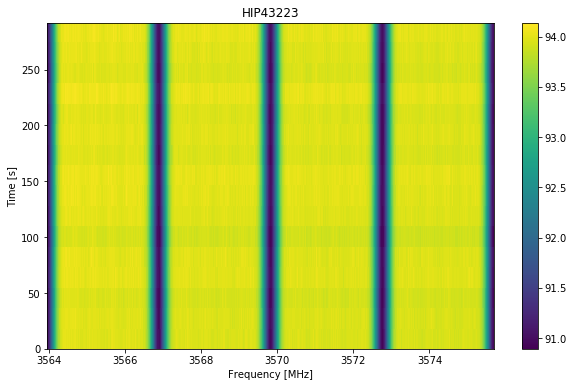

In [9]:
fil = Waterfall(fil_fn)

%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))

fil.plot_waterfall()

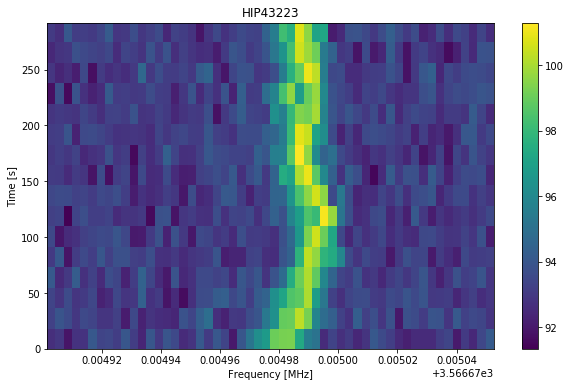

In [15]:
fil = Waterfall(fil_fn, f_start = 3566.674900, f_stop = 3566.675050)

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
fil.plot_waterfall()

In [30]:
2.7939677238464355 * 2**21 

5859375.0

In [6]:
# Find the maximum drift rates
max_drift_rate = 0.0
max_location = {'csv': 'data_dump/split_files/4194304_0000.dat', 'index': 0}
for i in np.arange(9):
    fil_fn = 'data_dump/split_files/4194304_%04d.fil' % i
    csv = 'data_dump/split_files/4194304_%04d.dat' % i
    
    # print('On %s' % csv)
    names = ['Top_Hit_#', 'Drift_Rate', 'SNR', 'Uncorrected_Frequency', 'Corrected_Frequency', 'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 'Full_number_of_hits']
    dataframe = pd.read_csv(csv, delim_whitespace=True, comment='#', names=names)
    series = dataframe['Drift_Rate']
    for j in np.arange(len(series)):
        if np.abs(series[j]) > np.abs(max_drift_rate):
            max_drift_rate = series[j]
            max_location['csv'] = csv
            max_location['index'] = j
    # print('Finished %s' % csv)
print('Max drift rate is %s' % max_drift_rate)
print('Location of max drifted signal is row %s in %s' % (max_location['index'],max_location['csv']))
    

Max drift rate is -6.5243459999999995
Location of max drifted signal is row 10 in data_dump/split_files/4194304_0006.dat


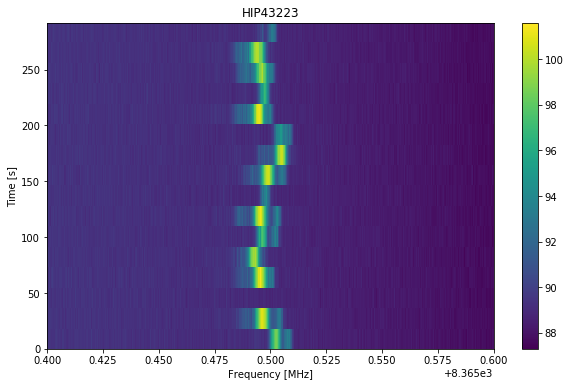

In [188]:
fil = Waterfall(fil_fn, f_start = 8365.4, f_stop = 8365.6)

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
fil.plot_waterfall()

In [118]:
dataframe

,Top_Hit_#,Drift_Rate,SNR,Uncorrected_Frequency,Corrected_Frequency,Index,freq_start,freq_end,SEFD,SEFD_freq,Coarse_Channel_Number,Full_number_of_hits
0,1,0.000000,2408.649130,8368.499998,8368.499998,54526,8368.504080,8368.495922,0.0,0.0,1,27854900
1,2,-0.019133,54.850983,8367.459855,8367.459855,426808,8367.463937,8367.455778,0.0,0.0,1,27854900
2,3,0.019133,100.063849,8366.625101,8366.625101,725578,8366.629183,8366.621024,0.0,0.0,1,27854900
3,4,0.000000,37.305680,8366.603221,8366.603221,733409,8366.607303,8366.599145,0.0,0.0,1,27854900
4,5,0.000000,33.802806,8366.515429,8366.515429,764831,8366.519511,8366.511353,0.0,0.0,1,27854900
5,6,0.000000,2946.667143,8366.499998,8366.499998,770354,8366.504080,8366.495922,0.0,0.0,1,27854900
6,7,0.000000,52402.236712,8366.256509,8366.256509,857502,8366.260591,8366.252433,0.0,0.0,1,27854900
7,8,0.000000,218.961399,8366.234524,8366.234524,865371,8366.238606,8366.230447,0.0,0.0,1,27854900
8,9,-6.524346,30.624686,8365.494812,8365.494812,1130124,8365.498894,8365.490736,0.0,0.0,1,27854900
9,10,0.019133,8082.146307,8365.256515,8365.256515,1215414,8365.260597,8365.252438,0.0,0.0,1,27854900


In [128]:
dataframe = dataframe[dataframe['Drift_Rate'] != 0.0]
dataframe

,Top_Hit_#,Drift_Rate,SNR,Uncorrected_Frequency,Corrected_Frequency,Index,freq_start,freq_end,SEFD,SEFD_freq,Coarse_Channel_Number,Full_number_of_hits,csv
1,2,-0.019133,54.850983,8367.459855,8367.459855,426808,8367.463937,8367.455778,0.0,0.0,1,27854900,data_dump/split_files/2097152_0012.dat
2,3,0.019133,100.063849,8366.625101,8366.625101,725578,8366.629183,8366.621024,0.0,0.0,1,27854900,data_dump/split_files/2097152_0012.dat
8,9,-6.524346,30.624686,8365.494812,8365.494812,1130124,8365.498894,8365.490736,0.0,0.0,1,27854900,data_dump/split_files/2097152_0012.dat
9,10,0.019133,8082.146307,8365.256515,8365.256515,1215414,8365.260597,8365.252438,0.0,0.0,1,27854900,data_dump/split_files/2097152_0012.dat


In [138]:
dataframe.reindex(dataframe.Drift_Rate.abs().sort_values().index)

,Top_Hit_#,Drift_Rate,SNR,Uncorrected_Frequency,Corrected_Frequency,Index,freq_start,freq_end,SEFD,SEFD_freq,Coarse_Channel_Number,Full_number_of_hits,csv
1,2,-0.019133,54.850983,8367.459855,8367.459855,426808,8367.463937,8367.455778,0.0,0.0,1,27854900,data_dump/split_files/2097152_0012.dat
2,3,0.019133,100.063849,8366.625101,8366.625101,725578,8366.629183,8366.621024,0.0,0.0,1,27854900,data_dump/split_files/2097152_0012.dat
9,10,0.019133,8082.146307,8365.256515,8365.256515,1215414,8365.260597,8365.252438,0.0,0.0,1,27854900,data_dump/split_files/2097152_0012.dat
8,9,-6.524346,30.624686,8365.494812,8365.494812,1130124,8365.498894,8365.490736,0.0,0.0,1,27854900,data_dump/split_files/2097152_0012.dat


In [144]:
dataframe.sort_values('Drift_Rate')

,Top_Hit_#,Drift_Rate,SNR,Uncorrected_Frequency,Corrected_Frequency,Index,freq_start,freq_end,SEFD,SEFD_freq,Coarse_Channel_Number,Full_number_of_hits,csv
8,9,-6.524346,30.624686,8365.494812,8365.494812,1130124,8365.498894,8365.490736,0.0,0.0,1,27854900,data_dump/split_files/2097152_0012.dat
1,2,-0.019133,54.850983,8367.459855,8367.459855,426808,8367.463937,8367.455778,0.0,0.0,1,27854900,data_dump/split_files/2097152_0012.dat
2,3,0.019133,100.063849,8366.625101,8366.625101,725578,8366.629183,8366.621024,0.0,0.0,1,27854900,data_dump/split_files/2097152_0012.dat
9,10,0.019133,8082.146307,8365.256515,8365.256515,1215414,8365.260597,8365.252438,0.0,0.0,1,27854900,data_dump/split_files/2097152_0012.dat


In [126]:
dataframe['csv'] = csv
dataframe

,Top_Hit_#,Drift_Rate,SNR,Uncorrected_Frequency,Corrected_Frequency,Index,freq_start,freq_end,SEFD,SEFD_freq,Coarse_Channel_Number,Full_number_of_hits,csv
0,1,0.000000,2408.649130,8368.499998,8368.499998,54526,8368.504080,8368.495922,0.0,0.0,1,27854900,data_dump/split_files/2097152_0012.dat
1,2,-0.019133,54.850983,8367.459855,8367.459855,426808,8367.463937,8367.455778,0.0,0.0,1,27854900,data_dump/split_files/2097152_0012.dat
2,3,0.019133,100.063849,8366.625101,8366.625101,725578,8366.629183,8366.621024,0.0,0.0,1,27854900,data_dump/split_files/2097152_0012.dat
3,4,0.000000,37.305680,8366.603221,8366.603221,733409,8366.607303,8366.599145,0.0,0.0,1,27854900,data_dump/split_files/2097152_0012.dat
4,5,0.000000,33.802806,8366.515429,8366.515429,764831,8366.519511,8366.511353,0.0,0.0,1,27854900,data_dump/split_files/2097152_0012.dat
5,6,0.000000,2946.667143,8366.499998,8366.499998,770354,8366.504080,8366.495922,0.0,0.0,1,27854900,data_dump/split_files/2097152_0012.dat
6,7,0.000000,52402.236712,8366.256509,8366.256509,857502,8366.260591,8366.252433,0.0,0.0,1,27854900,data_dump/split_files/2097152_0012.dat
7,8,0.000000,218.961399,8366.234524,8366.234524,865371,8366.238606,8366.230447,0.0,0.0,1,27854900,data_dump/split_files/2097152_0012.dat
8,9,-6.524346,30.624686,8365.494812,8365.494812,1130124,8365.498894,8365.490736,0.0,0.0,1,27854900,data_dump/split_files/2097152_0012.dat
9,10,0.019133,8082.146307,8365.256515,8365.256515,1215414,8365.260597,8365.252438,0.0,0.0,1,27854900,data_dump/split_files/2097152_0012.dat


In [21]:
# Order nonzero drift rates
df = pd.DataFrame()
for i in np.arange(14):
    fil_fn = 'data_dump/split_files/2097152_%04d.fil' % i
    csv = 'data_dump/split_files/2097152_%04d.dat' % i
    
    # print('On %s' % csv)
    names = ['Top_Hit_#', 'Drift_Rate', 'SNR', 'Uncorrected_Frequency', 'Corrected_Frequency', 'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 'Full_number_of_hits']
    dataframe = pd.read_csv(csv, delim_whitespace=True, comment='#', names=names)
    # dataframe = dataframe[dataframe['Drift_Rate'] != 0.0]
    dataframe['csv'] = csv
    df = df.append(dataframe, ignore_index=True)
df = df.reindex(df.Drift_Rate.abs().sort_values(ascending=False).index)
df1 = df
df
    

,Top_Hit_#,Drift_Rate,SNR,Uncorrected_Frequency,Corrected_Frequency,Index,freq_start,freq_end,SEFD,SEFD_freq,Coarse_Channel_Number,Full_number_of_hits,csv
128,9,-6.524346,30.624686,8365.494812,8365.494812,1130124,8365.498894,8365.490736,0.0,0.0,1,27854900,data_dump/split_files/2097152_0012.dat
3,4,-0.286995,223.552959,8437.984576,8437.984576,350851,8437.988658,8437.980500,0.0,0.0,1,9427938,data_dump/split_files/2097152_0000.dat
25,26,0.286995,223.552952,8437.015421,8437.015421,697725,8437.019503,8437.011345,0.0,0.0,1,9427938,data_dump/split_files/2097152_0000.dat
1,2,-0.124364,255.155727,8438.396429,8438.396429,203443,8438.400511,8438.392353,0.0,0.0,1,9427938,data_dump/split_files/2097152_0000.dat
27,28,0.124364,255.155739,8436.603568,8436.603568,845133,8436.607650,8436.599492,0.0,0.0,1,9427938,data_dump/split_files/2097152_0000.dat
26,27,0.076532,2409.358822,8436.902377,8436.902377,738185,8436.906459,8436.898301,0.0,0.0,1,9427938,data_dump/split_files/2097152_0000.dat
2,3,-0.076532,2409.359121,8438.097620,8438.097620,310391,8438.101702,8438.093544,0.0,0.0,1,9427938,data_dump/split_files/2097152_0000.dat
22,23,0.066965,465.143737,8437.257700,8437.257700,611010,8437.261782,8437.253624,0.0,0.0,1,9427938,data_dump/split_files/2097152_0000.dat
6,7,-0.066965,465.143723,8437.742297,8437.742297,437566,8437.746379,8437.738221,0.0,0.0,1,9427938,data_dump/split_files/2097152_0000.dat
11,12,-0.038266,79.188551,8437.548399,8437.548399,506965,8437.552480,8437.544322,0.0,0.0,1,9427938,data_dump/split_files/2097152_0000.dat


In [24]:
# Order nonzero drift rates
df = pd.DataFrame()
for i in np.arange(7):
    fil_fn = 'data_dump/split_files/4194304_%04d.fil' % i
    csv = 'data_dump/split_files/4194304_%04d.dat' % i
    
    # print('On %s' % csv)
    names = ['Top_Hit_#', 'Drift_Rate', 'SNR', 'Uncorrected_Frequency', 'Corrected_Frequency', 'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 'Full_number_of_hits']
    dataframe = pd.read_csv(csv, delim_whitespace=True, comment='#', names=names)
    #dataframe = dataframe[dataframe['Drift_Rate'] != 0.0]
    dataframe['csv'] = csv
    df = df.append(dataframe, ignore_index=True)
df = df.reindex(df.Drift_Rate.abs().sort_values(ascending=False).index)
df
    

,Top_Hit_#,Drift_Rate,SNR,Uncorrected_Frequency,Corrected_Frequency,Index,freq_start,freq_end,SEFD,SEFD_freq,Coarse_Channel_Number,Full_number_of_hits,csv
136,11,-6.524346,59.455311,8365.494812,8365.494812,81548,8365.498894,8365.490736,0.0,0.0,1,10998512,data_dump/split_files/4194304_0006.dat
3,4,-0.286995,218.927491,8437.984576,8437.984576,350851,8437.988658,8437.980500,0.0,0.0,0,9352029,data_dump/split_files/4194304_0000.dat
25,26,0.286995,218.927483,8437.015421,8437.015421,697725,8437.019503,8437.011345,0.0,0.0,0,9352029,data_dump/split_files/4194304_0000.dat
27,28,0.124364,249.851832,8436.603568,8436.603568,845133,8436.607650,8436.599492,0.0,0.0,0,9352029,data_dump/split_files/4194304_0000.dat
1,2,-0.124364,249.851821,8438.396429,8438.396429,203443,8438.400511,8438.392353,0.0,0.0,0,9352029,data_dump/split_files/4194304_0000.dat
26,27,0.076532,2357.809193,8436.902377,8436.902377,738185,8436.906459,8436.898301,0.0,0.0,0,9352029,data_dump/split_files/4194304_0000.dat
2,3,-0.076532,2357.809486,8438.097620,8438.097620,310391,8438.101702,8438.093544,0.0,0.0,0,9352029,data_dump/split_files/4194304_0000.dat
22,23,0.066965,455.331877,8437.257700,8437.257700,611010,8437.261782,8437.253624,0.0,0.0,0,9352029,data_dump/split_files/4194304_0000.dat
6,7,-0.066965,455.331864,8437.742297,8437.742297,437566,8437.746379,8437.738221,0.0,0.0,0,9352029,data_dump/split_files/4194304_0000.dat
5,6,0.038266,4043.368822,8437.782840,8437.782840,423055,8437.786922,8437.778764,0.0,0.0,0,9352029,data_dump/split_files/4194304_0000.dat


In [157]:
df[df.index.duplicated()]

,Top_Hit_#,Drift_Rate,SNR,Uncorrected_Frequency,Corrected_Frequency,Index,freq_start,freq_end,SEFD,SEFD_freq,Coarse_Channel_Number,Full_number_of_hits,csv


In [23]:
len(df) - len(df1)

10

In [4]:
index = 10
fil_fn = 'data_dump/split_files/4194304_%04d.fil' % index
csv = 'data_dump/split_files/4194304_%04d.dat' % index
names = ['Top_Hit_#', 'Drift_Rate', 'SNR', 'Uncorrected_Frequency', 'Corrected_Frequency', 'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 'Full_number_of_hits']
dataframe = pd.read_csv(csv, delim_whitespace=True, comment='#', names=names)
dataframe

,Top_Hit_#,Drift_Rate,SNR,Uncorrected_Frequency,Corrected_Frequency,Index,freq_start,freq_end,SEFD,SEFD_freq,Coarse_Channel_Number,Full_number_of_hits
0,1,0.000000,25.729137,8321.499999,8321.499999,99265,8321.504081,8321.495923,0.0,0.0,0,1
1,2,0.000000,31.883920,8317.499998,8317.499998,482345,8317.504080,8317.495922,0.0,0.0,1,1
2,3,-0.066965,202.774126,8312.559900,8312.559900,153323,8312.563982,8312.555824,0.0,0.0,3,12251
3,4,0.057399,27.032709,8312.553991,8312.553991,155438,8312.558073,8312.549915,0.0,0.0,3,12251
4,5,0.009566,53.171663,8312.452883,8312.452883,191626,8312.456965,8312.448807,0.0,0.0,3,12251


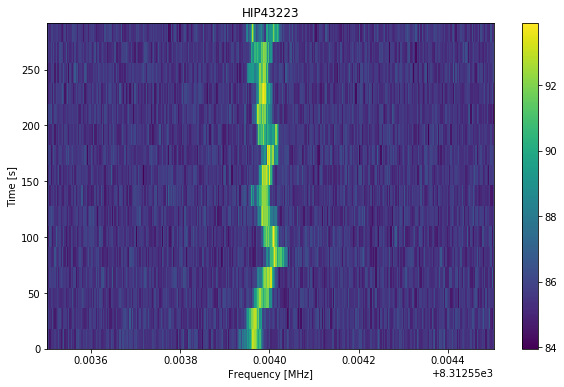

In [5]:
fil = Waterfall(fil_fn, f_start = 8312.5535, f_stop = 8312.5545)

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
fil.plot_waterfall()

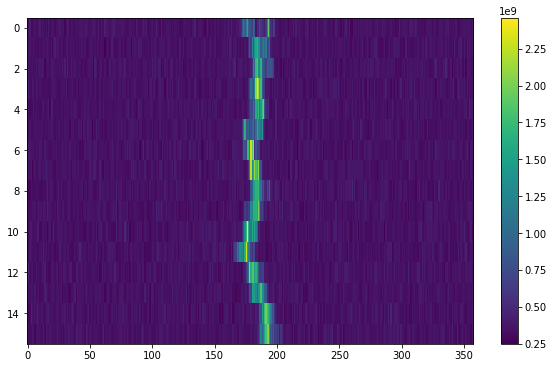

In [8]:
plt.figure(figsize=(10,6))
plt.imshow(np.squeeze(fil.data), aspect = 'auto')
plt.colorbar()

In [211]:
def preprocess(d):
    mean = np.mean(d, axis=1, keepdims=True)
    std = np.std(d, axis=1, keepdims=True)
    d = np.nan_to_num((d-mean)/std)
    return d

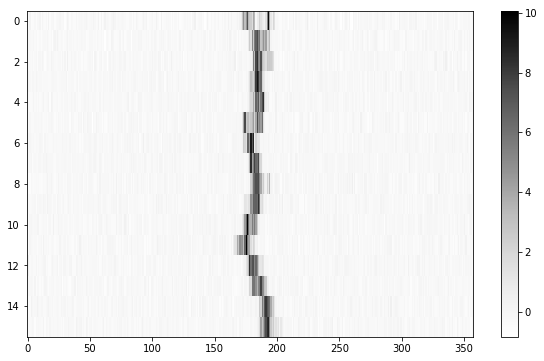

In [212]:
plt.figure(figsize=(10,6))
plt.imshow(preprocess(np.squeeze(fil.data)), aspect='auto')
plt.colorbar()

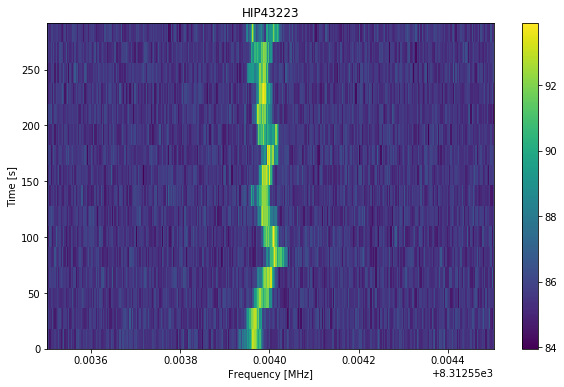

In [213]:
plt.figure(figsize=(10,6))
fil.plot_waterfall()


In [44]:
# Sort files with and without Doppler drifted hits
no_hits = []
hits_no_doppler = []
hits_with_doppler = []

df = pd.DataFrame()
for i in np.arange(416):
    fil_fn = 'data_dump/split_files/4194304_%04d.fil' % i
    csv = 'data_dump/split_files/4194304_%04d.dat' % i
    
    # print('On %s' % csv)
    names = ['Top_Hit_#', 'Drift_Rate', 'SNR', 'Uncorrected_Frequency', 'Corrected_Frequency', 'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 'Full_number_of_hits']
    dataframe = pd.read_csv(csv, delim_whitespace=True, comment='#', names=names)
    
    if len(dataframe) == 0:
        no_hits.append(i)
    elif all(dataframe['Drift_Rate'] == 0.0):
        hits_no_doppler.append(i)
    else:
        hits_with_doppler.append(i)
print('# no hits: %s' % len(no_hits))
print('# hits no doppler: %s' % len(hits_no_doppler))
print('# hits with doppler: %s' % len(hits_with_doppler))

# no hits: 235
# hits no doppler: 88
# hits with doppler: 93


In [47]:
print('No hits: %s\n' % (no_hits))
print('Hits no doppler: %s\n' % (hits_no_doppler))
print('Hits with doppler: %s\n' % (hits_with_doppler))

No hits: [11, 18, 19, 20, 21, 22, 24, 26, 28, 29, 31, 32, 34, 35, 36, 37, 38, 39, 40, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 101, 102, 106, 109, 110, 113, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 227, 229, 230, 231, 232, 233, 234, 235, 236, 238, 239, 241, 243, 244, 246, 247, 248, 249, 252, 254, 255, 257, 259, 262, 264, 265, 268, 270, 271, 273, 275, 278, 279, 280,

In [39]:
any(dataframe['Drift_Rate'] != 0.0)

True

In [29]:
dataframe.loc[0]['SNR']

44.457353999999995

In [33]:
for index, row in dataframe.iterrows():
    print(row['Drift_Rate'])

0.0
0.0
0.0
0.0
0.0
-0.009566
0.0
0.0


In [1]:
'test.fil'[:-4] + '.dat'

'test.dat'

In [5]:
fil_fn

'data_dump/split_files/4194304_0415.fil'

In [6]:
import os
os.path.split(fil_fn)

('data_dump/split_files', '4194304_0415.fil')